In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import anatools.data as data
import anatools.analysis as ana
ana.start()

Generate a list of datasets for each sample
----

In [5]:
basedir = "/home/gcorreia/cernbox/HEP_Project/CMS_HHDM/OUTPUT/VVCR"
list_basedir = os.listdir(basedir)
TreeName = 'selection'
period = '16'
samples = {
    'Signal_400_100':           [i for i in list_basedir if 'Signal_400_100' in i], 
    'Signal_600_150':           [i for i in list_basedir if 'Signal_600_150' in i],
    'Signal_1000_800':          [i for i in list_basedir if 'Signal_1000_800' in i],
    'Signal_1000_100':          [i for i in list_basedir if 'Signal_1000_100' in i],
    #'DYJetsToLL_M-10to50':      [i for i in list_basedir if 'DYJetsToLL_M-10to50' in i],
    'DYJetsToLL_M-50':          [i for i in list_basedir if 'DYJetsToLL_M-50' in i],
    'DYJetsToLL_Pt-50To100':    [i for i in list_basedir if 'DYJetsToLL_Pt-50To100' in i],
    'DYJetsToLL_Pt-100To250':   [i for i in list_basedir if 'DYJetsToLL_Pt-100To250' in i],
    'DYJetsToLL_Pt-250To400':   [i for i in list_basedir if 'DYJetsToLL_Pt-250To400' in i],
    'DYJetsToLL_Pt-400To650':   [i for i in list_basedir if 'DYJetsToLL_Pt-400To650' in i],
    'DYJetsToLL_Pt-650ToInf':   [i for i in list_basedir if 'DYJetsToLL_Pt-650ToInf' in i],
    'TTTo2L2Nu':                [i for i in list_basedir if 'TTTo2L2Nu' in i],
    'TTToSemiLeptonic':         [i for i in list_basedir if 'TTToSemiLeptonic' in i],
    'ST_tW_top':                [i for i in list_basedir if 'ST_tW_top' in i],
    'ST_tW_antitop':            [i for i in list_basedir if 'ST_tW_antitop' in i], 
    'ST_t-channel_top':         [i for i in list_basedir if 'ST_t-channel_top' in i],
    'ST_t-channel_antitop':     [i for i in list_basedir if 'ST_t-channel_antitop' in i],
    #'ST_s-channel':             [i for i in list_basedir if 'ST_s-channel' in i], 
    'ZZ':                       [i for i in list_basedir if 'ZZ' == i.split("_")[0]],
    'WZ':                       [i for i in list_basedir if 'WZ' == i.split("_")[0]], 
    'WW':                       [i for i in list_basedir if 'WW' == i.split("_")[0]],
    'WWZ':                      [i for i in list_basedir if 'WWZ' in i],
    'ZZZ':                      [i for i in list_basedir if 'ZZZ' in i],
    'WWW':                      [i for i in list_basedir if 'WWW' in i],
    #'TTZToQQ':                  [i for i in list_basedir if 'TTZToQQ' in i],
    #'TTZToNuNu':                [i for i in list_basedir if 'TTZToNuNu' in i],
    #'TWZToLL_thad_Wlept':       [i for i in list_basedir if 'TWZToLL_thad_Wlept' in i], 
    #'TWZToLL_tlept_Whad':       [i for i in list_basedir if 'TWZToLL_tlept_Whad' in i],
    #'TWZToLL_tlept_Wlept':      [i for i in list_basedir if 'TWZToLL_tlept_Wlept' in i],
    #'WGToLNuG':                 [i for i in list_basedir if 'WGToLNuG' in i],
    'ZGToLLG':                  [i for i in list_basedir if 'ZGToLLG' in i],
    #'WJetsToLNu':               [i for i in list_basedir if 'WJetsToLNu' in i],
    'TTGJets':                  [i for i in list_basedir if 'TTGJets' in i],
    'TTGamma':                  [i for i in list_basedir if 'TTGamma' in i],
    #'TTWZ':                     [i for i in list_basedir if 'TTWZ' in i],
    #'TTZZ':                     [i for i in list_basedir if 'TTZZ' in i],
    'Data':                     [i for i in list_basedir if 'Data' in i],
    #'Data_DoubleEle':           [i for i in list_basedir if 'Data_DoubleEle' in i],
    #'Data_DoubleMu':            [i for i in list_basedir if 'Data_DoubleMu' in i],
    #'Data_SingleEle':           [i for i in list_basedir if 'Data_SingleEle' in i],
    #'Data_SingleMu':            [i for i in list_basedir if 'Data_SingleMu' in i],
    #'Data_EleMu':               [i for i in list_basedir if 'Data_EleMu' in i],
}


Check jobs integrity
----

In [6]:
Integrity_Jobs, Error_OldJobs, Error_Output = data.check_integrity(basedir, period, samples)
Integrity_Jobs = pd.DataFrame(Integrity_Jobs)

display(Integrity_Jobs)
        
#print("")
#print("====================================================================================================")
#print("List of jobs that are not part of the jobs submitted: (remove them!)")
#print(*Error_OldJobs, sep=' ')
#print("====================================================================================================")


print("")
print("====================================================================================================")
print("List of jobs with error in the output:")
print(*Error_Output, sep=' ')
print("====================================================================================================")
print("")

if (len(Error_Output) > 0):
    textfile = open("bad_jobs.txt", "w")
    for element in Error_Output:
        textfile.write(element + "\n")
    textfile.close()

100%|██████████| 26/26 [00:27<00:00,  1.06s/it]


,Dataset,nFiles,Good,Bad,Entries
0,Signal_400_100,1,1,0,284
1,Signal_600_150,1,1,0,392
2,Signal_1000_800,1,1,0,537
3,Signal_1000_100,1,1,0,646
4,DYJetsToLL_M-50,48,48,0,366
5,DYJetsToLL_Pt-50To100,65,65,0,4119
6,DYJetsToLL_Pt-100To250,53,53,0,17716
7,DYJetsToLL_Pt-250To400,19,19,0,14182
8,DYJetsToLL_Pt-400To650,19,19,0,2303
9,DYJetsToLL_Pt-650ToInf,20,20,0,3129



List of jobs with error in the output:




Get jobs to be resubmitted
----

In [5]:
with open('jobs_list.txt') as f:
    jobs_list = f.readlines()

with open('bad_jobs.txt') as f:
    bad_jobs = f.readlines()

bad_jobs_n = 0
for line in bad_jobs:
    bj_type = "_files".join( line.split("_files", 1)[:1] )
    bj_number = line.replace( bj_type+'_files_' , '')
    bj_number = "_".join(bj_number.split("_", 1)[:1])
    #print(' ')
    #print('type:',bj_type, ' # job_number:',bj_number)
    for job in jobs_list:
        if bj_type in job:
            #remove '\n' from the string
            job_line = job.rstrip("\n")
            test_l4 = ",".join( job_line.split(",", 4)[:4] )
            test_l5 = job_line.replace( test_l4, '')
            test_l5 = ",".join( test_l5.split(",", 2)[:2] )
            #print( test_l5)
            bj_number2 = ', '+bj_number+','
            test_l52 = ', '+test_l5+',' 
            if bj_number2 in test_l52:
                # print( bj_number2)
                # print( test_l5)
                test_l6 = "[".join( job_line.split("[", 1)[:1] )
                job_line = job_line.replace( test_l6, '')
                # print(test_l6)
                #print('type:',bj_type, ' # job_number:',bj_number)
                print(job_line)
                bad_jobs_n = bad_jobs_n + 1
print (bad_jobs_n)

[['DYJetsToLL_Pt-50To100_16', '1602020', 'Datasets/Files/bkg_16/UL/DYJetsToLL_Pt-50To100.txt', 66], 33, 34, 0, 0],
[['DYJetsToLL_Pt-50To100_16', '1602020', 'Datasets/Files/bkg_16/UL/DYJetsToLL_Pt-50To100.txt', 66], 61, 62, 0, 0],
[['DYJetsToLL_Pt-100To250_16', '1602030', 'Datasets/Files/bkg_16/UL/DYJetsToLL_Pt-100To250.txt', 53], 24, 25, 0, 0],
[['TTTo2L2Nu_16', '1603000', 'Datasets/Files/bkg_16/UL/TTTo2L2Nu.txt', 102], 40, 41, 0, 0],
[['Data_EleMu_H_16', '1600480', 'Datasets/Files/data_16/UL/EleMu_H.txt', 24], 19, 20, 0, 0],
[['Data_DoubleEle_H_16', '1600180', 'Datasets/Files/data_16/UL/DoubleEle_H.txt', 60], 43, 44, 0, 0],
[['Data_SingleEle_G_16', '1600070', 'Datasets/Files/data_16/UL/SingleEle_G.txt', 70], 65, 66, 0, 0],
[['Data_EleMu_G_16', '1600470', 'Datasets/Files/data_16/UL/EleMu_G.txt', 29], 2, 3, 0, 0],
[['Data_SingleMu_G_16', '1600270', 'Datasets/Files/data_16/UL/SingleMu_G.txt', 86], 46, 47, 0, 0],
9


Generate cutflow and files
----

100%|██████████| 26/26 [00:31<00:00,  1.22s/it]


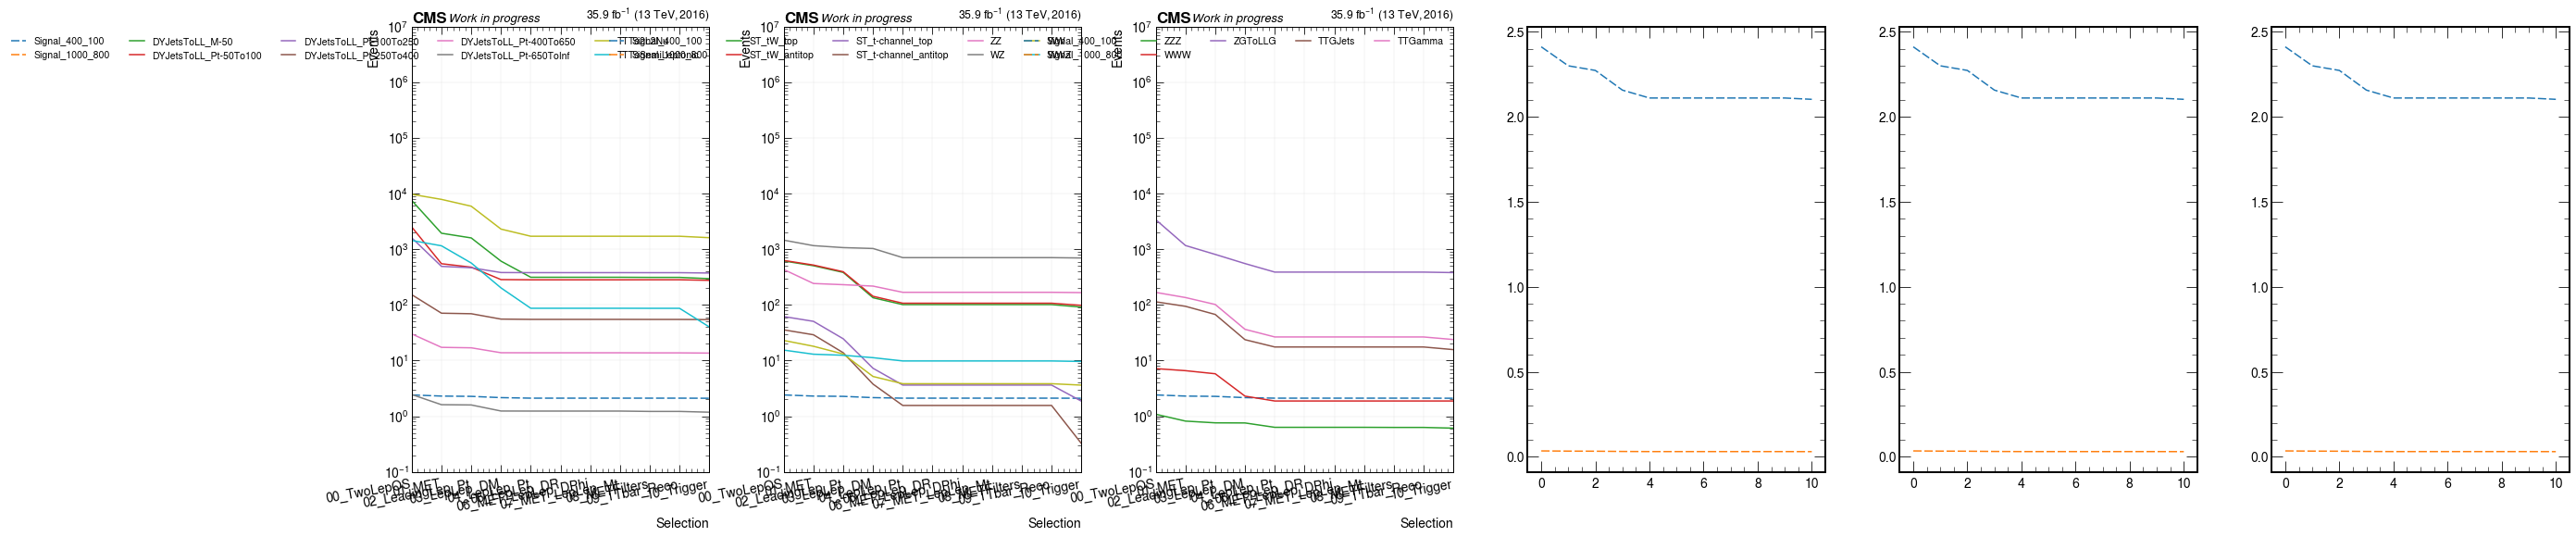

In [7]:
data.generate_cutflow(basedir, period, samples)
data.generate_files(basedir, period, samples, format="parquet")